<a href="https://colab.research.google.com/github/shakebkhan/deeplearning/blob/main/Chest_X_Ray_Classification_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [ ]:
import pandas as pd
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense, Input


import os

import matplotlib.pyplot as plt

import numpy as np

from sklearn import metrics
import time
import PIL
import PIL.Image

In [ ]:
img_width, img_height = 150, 150

train_data_dir = "D:\\chest_xray\\train"
test_data_dir =  "D:\\chest_xray\\test"

nb_train_samples = 2000

validation_data_dir = "D:\\chest_xray\\val"

nb_validation_samples = 800

batch_size = 16

epochs = 5

test_generator_samples = 300

test_batch_size = 25

input_shape = (img_width, img_height, 3)

In [ ]:
from keras.models import Sequential
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

**Model Design**

In [ ]:
model = Sequential()
model.add(Input(shape=(img_width,img_height,3)))
model.add(Conv2D(filters=64,kernel_size=3,strides=2,padding='same', activation='relu'))
model.add(MaxPool2D())
model.add(Conv2D(filters=32,kernel_size=3,activation='relu'))
model.add(MaxPool2D())
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 75, 75, 64)        1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 37, 37, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 35, 35, 32)        18464     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 17, 17, 32)       0         
 2D)                                                             
                                                                 
Total params: 20,256
Trainable params: 20,256
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model = Sequential()

In [ ]:
model.add(Input(shape = input_shape ))

model.add(Conv2D(
             filters=32,

            kernel_size=(3, 3),
            strides = (1,1),

             use_bias=True,
             padding='valid',
             name="Ist_conv_layer"
             )
         )

In [ ]:
Model: "sequential_3"

In [ ]:
model.add(Activation('relu'))           # max {0,x}

# 4.5
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Ist_conv_layer (Conv2D)     (None, 148, 148, 32)      896       
                                                                 
 activation (Activation)     (None, 148, 148, 32)      0         
                                                                 
Total params: 896
Trainable params: 896
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.add(MaxPool2D(pool_size=(2, 2)))

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Ist_conv_layer (Conv2D)     (None, 148, 148, 32)      896       
                                                                 
 activation (Activation)     (None, 148, 148, 32)      0         
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 74, 74, 32)       0         
 2D)                                                             
                                                                 
Total params: 896
Trainable params: 896
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.add(Conv2D(32,
                (3, 3),
                activation = 'relu',
                name = "IInd_con_layer"))

model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Ist_conv_layer (Conv2D)     (None, 148, 148, 32)      896       
                                                                 
 activation (Activation)     (None, 148, 148, 32)      0         
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 74, 74, 32)       0         
 2D)                                                             
                                                                 
 IInd_con_layer (Conv2D)     (None, 72, 72, 32)        9248      
                                                                 
Total params: 10,144
Trainable params: 10,144
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.add(MaxPool2D(pool_size=(2, 2)))

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Ist_conv_layer (Conv2D)     (None, 148, 148, 32)      896       
                                                                 
 activation (Activation)     (None, 148, 148, 32)      0         
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 74, 74, 32)       0         
 2D)                                                             
                                                                 
 IInd_con_layer (Conv2D)     (None, 72, 72, 32)        9248      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 36, 36, 32)       0         
 2D)                                                             
                                                                 
Total params: 10,144
Trainable params: 10,144
Non-trai

In [ ]:
model.add(Conv2D(64, (3, 3), name = "IIIrd_conv_layer"))

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Ist_conv_layer (Conv2D)     (None, 148, 148, 32)      896       
                                                                 
 activation (Activation)     (None, 148, 148, 32)      0         
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 74, 74, 32)       0         
 2D)                                                             
                                                                 
 IInd_con_layer (Conv2D)     (None, 72, 72, 32)        9248      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 36, 36, 32)       0         
 2D)                                                             
                                                                 
 IIIrd_conv_layer (Conv2D)   (None, 34, 34, 64)       

In [ ]:
model.add(Activation('relu'))

model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Flatten(name = "FlattenedLayer"))

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Ist_conv_layer (Conv2D)     (None, 148, 148, 32)      896       
                                                                 
 activation (Activation)     (None, 148, 148, 32)      0         
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 74, 74, 32)       0         
 2D)                                                             
                                                                 
 IInd_con_layer (Conv2D)     (None, 72, 72, 32)        9248      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 36, 36, 32)       0         
 2D)                                                             
                                                                 
 IIIrd_conv_layer (Conv2D)   (None, 34, 34, 64)       

In [ ]:
model.add(Dense(64, activation='relu'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Ist_conv_layer (Conv2D)     (None, 148, 148, 32)      896       
                                                                 
 activation (Activation)     (None, 148, 148, 32)      0         
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 74, 74, 32)       0         
 2D)                                                             
                                                                 
 IInd_con_layer (Conv2D)     (None, 72, 72, 32)        9248      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 36, 36, 32)       0         
 2D)                                                             
                                                                 
 IIIrd_conv_layer (Conv2D)   (None, 34, 34, 64)       

In [ ]:
model.add(Dropout(0.5))

model.add(Dense(1, activation = 'sigmoid'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Ist_conv_layer (Conv2D)     (None, 148, 148, 32)      896       
                                                                 
 activation (Activation)     (None, 148, 148, 32)      0         
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 74, 74, 32)       0         
 2D)                                                             
                                                                 
 IInd_con_layer (Conv2D)     (None, 72, 72, 32)        9248      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 36, 36, 32)       0         
 2D)                                                             
                                                                 
 IIIrd_conv_layer (Conv2D)   (None, 34, 34, 64)       

In [ ]:
model.compile(
              loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [ ]:
tr_dtgen = ImageDataGenerator(
                              rescale=1. / 255,
                              shear_range=0.2,
                              zoom_range=0.2,
                              horizontal_flip=True,
                              )

In [ ]:
train_generator = tr_dtgen.flow_from_directory(
                                               train_data_dir,
                                               target_size=(img_width, img_height),
                                               batch_size=batch_size,
                                               class_mode='binary'


                                                )


Found 5216 images belonging to 2 classes.


In [ ]:
val_dtgen = ImageDataGenerator(rescale=1. / 255)

In [ ]:
validation_generator = val_dtgen.flow_from_directory(
                                                     validation_data_dir,
                                                     target_size=(img_width, img_height),
                                                     batch_size=batch_size,
                                                     class_mode='binary'
                                                     )

Found 16 images belonging to 2 classes.


In [ ]:
start = time.time()
history = model.fit_generator(

                              generator = train_generator,

                              steps_per_epoch=nb_train_samples // batch_size,

                              epochs=1,

                              validation_data=validation_generator,
                              verbose = 1,
                              validation_steps=nb_validation_samples // batch_size
                              )

end = time.time()
(end - start)/60  # 7min


C:\Users\ubuntu\AppData\Local\Temp\ipykernel_36872\202393389.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


125/125 [==============================] - 30s 233ms/step - loss: 0.5668 - accuracy: 0.7425 - val_loss: 0.6145 - val_accuracy: 0.6875


0.5096030712127686

In [ ]:
result = model.evaluate(
                        validation_generator,
                        verbose = 1,
                        steps = 4
                        )

result

4/4 [==============================] - 0s 6ms/step - loss: 0.6145 - accuracy: 0.6875


[0.6145021915435791, 0.6875]

In [ ]:
test_dtgen = ImageDataGenerator(rescale=1. / 255)

test_generator = test_dtgen.flow_from_directory(
                                                test_data_dir,

                                                target_size=(img_width, img_height),

                                                batch_size=batch_size,

                                                class_mode='binary'
                                                )

Found 624 images belonging to 2 classes.


In [ ]:
im = test_generator
images = next(im)
images[0].shape

(16, 150, 150, 3)

1/1 [==============================] - 0s 47ms/step


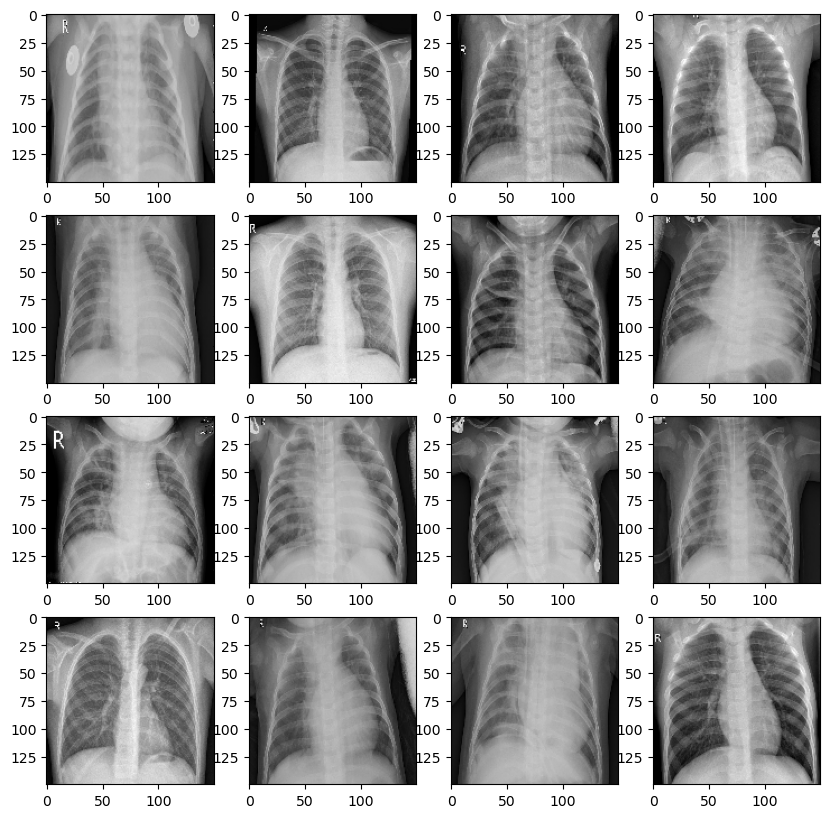

In [ ]:
results = model.predict(images[0])

import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
_=plt.figure(figsize= (10,10))
for i in range(results.shape[0]):
    _=plt.subplot(4,4,i+1)
    _=imshow(images[0][i]) ;

plt.show() ;